# Template Matching

**Import some labrarys**

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

**Load Image**

In [2]:
# Load the dog image sammy
full = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/sammy.jpg')
# Conver BGR to RGB channels
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

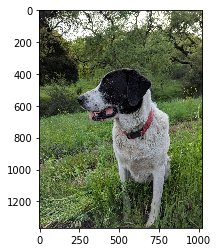

In [3]:
plt.imshow(full)

In [10]:
full.shape

(1367, 1025, 3)

### Subset of the larger image

**Load large image**

In [7]:
face = cv2.imread('/Users/neemiasbsilva/Downloads/Computer-Vision-with-Python/DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

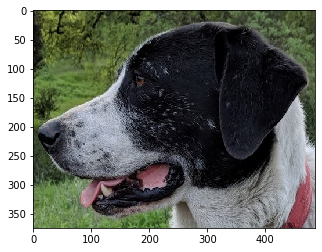

In [8]:
plt.imshow(face)

In [9]:
face.shape

(375, 486, 3)

**Using the eval function**

In [11]:
mystring = 'sum'
eval(mystring)

<function sum(iterable, start=0, /)>

In [12]:
myfunc = eval(mystring)

In [13]:
myfunc([1, 2, 3])

6

In [14]:
# All the 6 methods in a list
# Note how we are using string, later on we'll use the eval() function
# for more detaild of methods check documentation
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED',
           'cv2.TM_CCORR', 'cv2.TM_CCORR', 'cv2.TM_CCORR_NORMED',
           'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

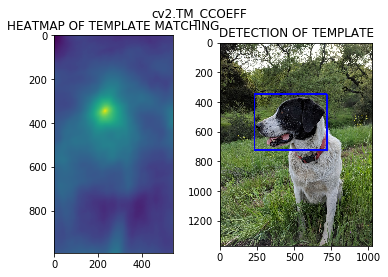

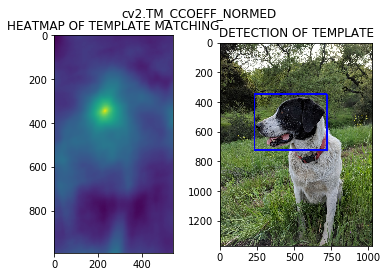

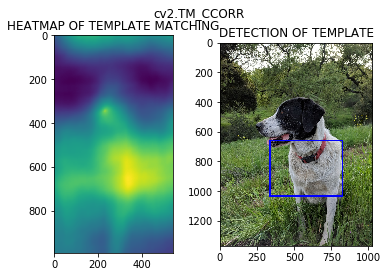

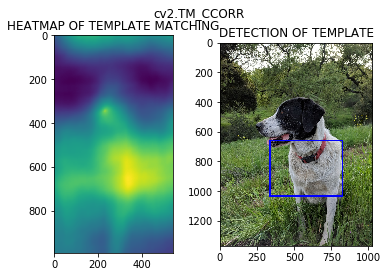

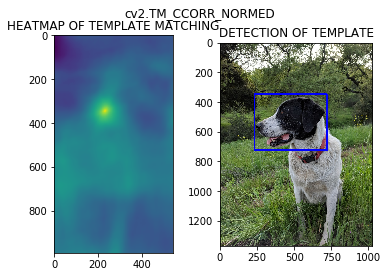

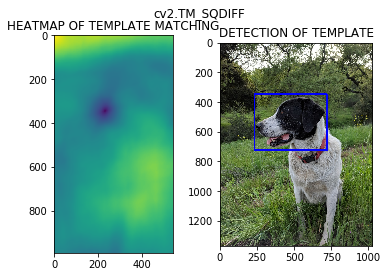

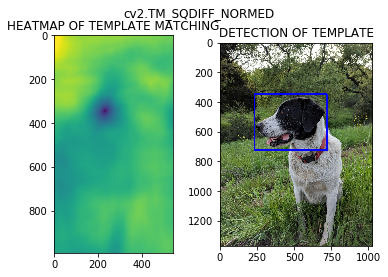

In [18]:
for m in methods:
    
    # Create a copy of image
    full_copy = full.copy()
    
    method = eval(m)
    
    # Template Matching
    
    
    res = cv2.matchTemplate(full, face, method)
    
    min_val, max_val, min_location, max_location = cv2.minMaxLoc(res)
    
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_location
    else:
        top_left = max_location
        
    height, width, channels = face.shape
    
    bottom_right = (top_left[0]+width, top_left[1]+height)
    
    cv2.rectangle(full_copy, top_left, bottom_right, (0, 0, 255), 10)
    
    # Plot and show the images
    
    plt.subplot(121)
    plt.imshow(res)
    plt.title('HEATMAP OF TEMPLATE MATCHING')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('DETECTION OF TEMPLATE')
    
    # Title with the method used
    plt.suptitle(m)
    
    plt.show()
    print('\n\n\n')